# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Data-set;-The-Database-of-Faces" data-toc-modified-id="Data-set;-The-Database-of-Faces-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data set; The Database of Faces</a></div><div class="lev2 toc-item"><a href="#Data-Sample" data-toc-modified-id="Data-Sample-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Sample</a></div><div class="lev2 toc-item"><a href="#Build-Data-Array" data-toc-modified-id="Build-Data-Array-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Build Data Array</a></div><div class="lev1 toc-item"><a href="#PCA" data-toc-modified-id="PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA</a></div><div class="lev2 toc-item"><a href="#Image-Restoration" data-toc-modified-id="Image-Restoration-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image Restoration</a></div><div class="lev2 toc-item"><a href="#Eigenface" data-toc-modified-id="Eigenface-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Eigenface</a></div><div class="lev1 toc-item"><a href="#KPCA" data-toc-modified-id="KPCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>KPCA</a></div><div class="lev2 toc-item"><a href="#Eigenface" data-toc-modified-id="Eigenface-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Eigenface</a></div>

# Data set; The Database of Faces

In [52]:
!rm -rf ./data/
!ls

README.md  main.ipynb


In [53]:
import os
if not os.path.exists("./data/"):
    os.makedirs("./data/")

In [54]:
!ls

README.md  data       main.ipynb


> The files are in PGM format, and can conveniently be viewed on UNIX (TM) systems using the 'xv' program. The size of each image is 92x112 pixels, with 256 grey levels per pixel. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). Source : http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

In [55]:
from six.moves.urllib import request
request.urlretrieve("http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.zip","./data/att_faces.zip")

('./data/att_faces.zip', <http.client.HTTPMessage at 0x107872630>)

In [56]:
!ls -d data/*

data/att_faces.zip


In [57]:
import zipfile
zip_ref = zipfile.ZipFile("./data/att_faces.zip", 'r')
zip_ref.extractall("./data/")
zip_ref.close()

In [58]:
!ls -d data/*

data/README        data/s18           data/s28           data/s38
data/att_faces.zip data/s19           data/s29           data/s39
data/s1            data/s2            data/s3            data/s4
data/s10           data/s20           data/s30           data/s40
data/s11           data/s21           data/s31           data/s5
data/s12           data/s22           data/s32           data/s6
data/s13           data/s23           data/s33           data/s7
data/s14           data/s24           data/s34           data/s8
data/s15           data/s25           data/s35           data/s9
data/s16           data/s26           data/s36
data/s17           data/s27           data/s37


In [59]:
!ls -d data/s1/*

data/s1/1.pgm  data/s1/2.pgm  data/s1/4.pgm  data/s1/6.pgm  data/s1/8.pgm
data/s1/10.pgm data/s1/3.pgm  data/s1/5.pgm  data/s1/7.pgm  data/s1/9.pgm


## Data Sample

In [68]:
from PIL import Image
import numpy as np
raw_im = Image.open('./data/s1/1.pgm').convert('L')
array_im = np.array(im)

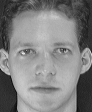

In [69]:
raw_im

In [76]:
print(array_im.shape)
print(array_im)
print(array_im.flatten())

(112, 92)
[[48 49 45 ..., 56 56 54]
 [45 52 39 ..., 52 50 51]
 [45 50 42 ..., 48 53 50]
 ..., 
 [50 48 50 ..., 45 46 46]
 [45 54 49 ..., 46 47 47]
 [51 51 51 ..., 47 46 46]]
[48 49 45 ..., 47 46 46]


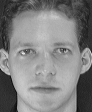

In [120]:
Image.fromarray(array_im)

## Build Data Array

In [359]:
number_of_person = 40
number_of_picture_per_person = 10
number_of_elements = array_im.shape[0] * array_im.shape[1] # 112*92
data = np.zeros((number_of_person * number_of_picture_per_person, number_of_elements))

In [360]:
counter = 0
for i in range(number_of_person):
    for j in range(number_of_picture_per_person):
        data[counter] = np.array(Image.open("data/s{0}/{1}.pgm".format(i+1,j+1)).convert('L')).flatten()
        counter += 1

In [361]:
mean_vec = np.mean(data, axis=0)
mean_vec

array([ 85.6175,  85.5775,  85.925 , ...,  76.87  ,  75.865 ,  75.2275])

In [362]:
std_vec = np.std(data, axis=0)
std_vec

array([ 35.78325298,  35.68457641,  35.56268234, ...,  46.90056609,
        44.42585705,  43.95748791])

In [368]:
for i in range(counter):
    data[i] = (data[i] - mean_vec) / std_vec

In [369]:
data

array([[-1.05125993, -1.02502268, -1.15078496, ..., -0.63687931,
        -0.67224364, -0.66490378],
       [-0.71590752, -0.71676625, -0.67275578, ..., -0.95670487,
        -0.94235661, -0.93789482],
       [-1.30277423, -1.16513923, -0.92583005, ..., -1.02066998,
        -1.12243192, -1.05164108],
       ..., 
       [ 1.10058468,  0.93660913,  1.07064477, ..., -0.87141805,
        -0.82980954, -0.8013993 ],
       [ 0.93290848,  0.96463244,  0.95816732, ...,  0.25863227,
         0.40820822,  0.22231707],
       [ 1.10058468,  1.07672569,  1.07064477, ..., -0.87141805,
        -0.9198472 , -0.93789482]])

In [371]:
data.shape

(400, 10304)

In [687]:
1/400 * data.T @ data # 標本相関行列

array([[ 1.        ,  0.99357094,  0.9924485 , ..., -0.0911466 ,
        -0.07055043, -0.03737454],
       [ 0.99357094,  1.        ,  0.9934313 , ..., -0.08966899,
        -0.06973336, -0.03728562],
       [ 0.9924485 ,  0.9934313 ,  1.        , ..., -0.08892552,
        -0.06679533, -0.03649965],
       ..., 
       [-0.0911466 , -0.08966899, -0.08892552, ...,  1.        ,
         0.92613359,  0.86433606],
       [-0.07055043, -0.06973336, -0.06679533, ...,  0.92613359,
         1.        ,  0.94076559],
       [-0.03737454, -0.03728562, -0.03649965, ...,  0.86433606,
         0.94076559,  1.        ]])

# PCA

In [372]:
%matplotlib inline
import numpy as np
import sklearn.decomposition as decomp
import matplotlib.pyplot as plt

In [586]:
pca = decomp.PCA()
pca.fit(data)
E = pca.explained_variance_ratio_
print(pca.components_.shape)

(400, 10304)


## Image Restoration

In [587]:
transformed_data = pca.transform(data)
transformed_data.shape

(400, 400)

In [588]:
def visualize_face(data):
    plt.imshow(Image.fromarray((std_vec * data + mean_vec).reshape(112,92).astype(np.uint8)), cmap='gray')
    plt.show()

Original Data

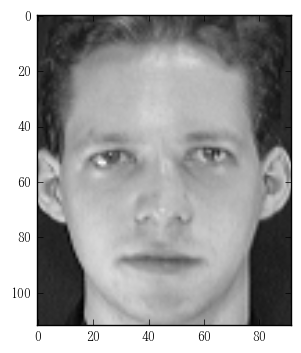

In [773]:
visualize_face(data[0])

Image Restoration with limited principal components.

In [1015]:
index = 0
for i in np.cumsum(E):
    if i > 0.95:
        print(index)
        break
    index += 1

191


Image Restoration with 200 components. Cumulative contribution ratio is 0.9540134735137836.


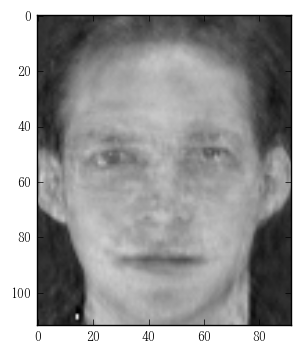

In [924]:
print("Image Restoration with {0} components. Cumulative contribution ratio is {1}.".format(pca.components_[:200].shape[0], np.cumsum(E)[200]))
visualize_face(transformed_data[0][:200] @ pca.components_[:200])

## Eigenface

Eigenface 1 with contribution 0.1609679694800078:


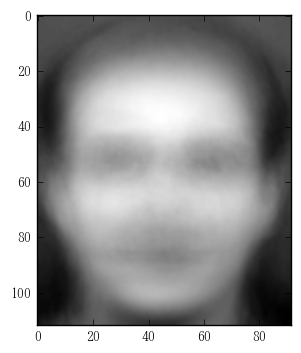

Eigenface 2 with contribution 0.1251016457589954:


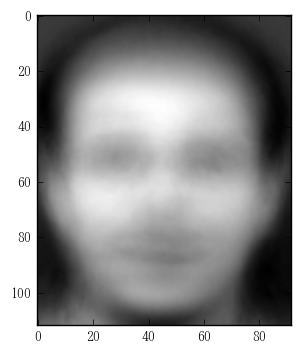

Eigenface 3 with contribution 0.0812922717481364:


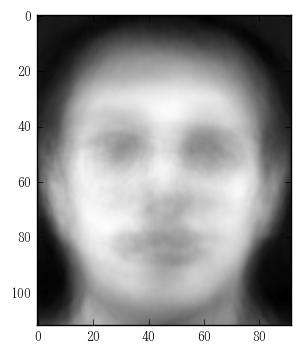

Eigenface 4 with contribution 0.05746099657145736:


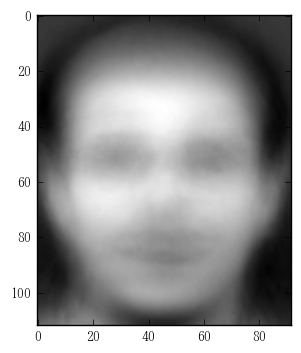

Eigenface 5 with contribution 0.0505572444688707:


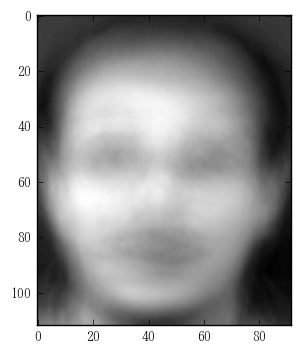

Eigenface 6 with contribution 0.030648331149216057:


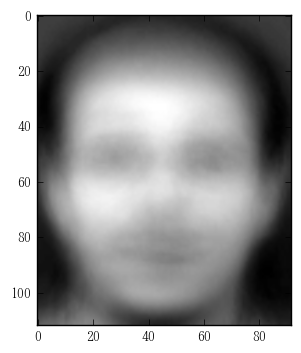

Eigenface 7 with contribution 0.023824003108218368:


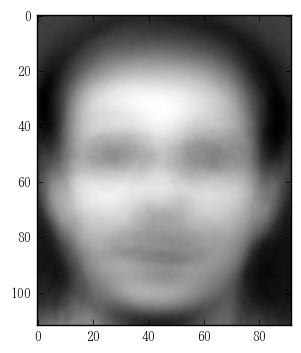

Eigenface 8 with contribution 0.02182406916226089:


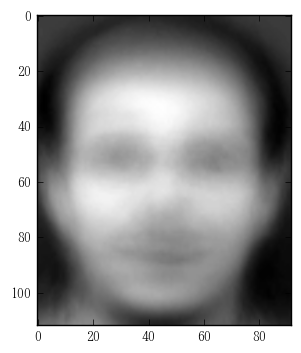

Eigenface 9 with contribution 0.020734888617777305:


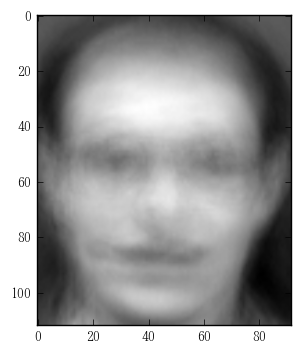

Eigenface 10 with contribution 0.019425488245887648:


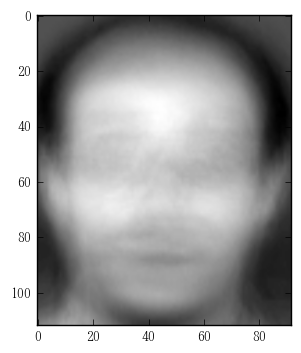

In [815]:
for i in range(10):
    print("Eigenface {0} with contribution {1}:".format(i+1, E[i]))
    visualize_face(transformed_data[0][i] * pca.components_[i])

# KPCA

In [1132]:
kpca = decomp.KernelPCA(n_components = 200, kernel="poly", degree=20, fit_inverse_transform=True)
kpca.fit(data)
transformed_data = kpca.transform(data)
restored_data = kpca.inverse_transform(transformed_data)

In [1133]:
print("第一主成分の寄与率",kpca.lambdas_[0]/np.sum(kpca.lambdas_))
print(kpca.lambdas_) # 固有ベクトルの値

第一主成分の寄与率 0.233664653535
[  6.89899157e+09   5.54779307e+09   2.85525345e+09   1.71391558e+09
   1.58150376e+09   1.08549049e+09   9.24325805e+08   8.33428294e+08
   8.11098127e+08   6.46012001e+08   6.22190812e+08   5.34228334e+08
   5.05358440e+08   4.99593599e+08   4.10489171e+08   3.09014480e+08
   3.04262491e+08   2.45201572e+08   2.36757445e+08   2.28990174e+08
   2.06891538e+08   1.99742921e+08   1.73493936e+08   1.65767833e+08
   1.53831524e+08   1.43245214e+08   9.91219067e+07   8.76940710e+07
   8.54300654e+07   7.23747130e+07   6.77426457e+07   5.56196108e+07
   5.41073373e+07   4.48185023e+07   4.16523880e+07   3.33183085e+07
   3.24109342e+07   3.12116174e+07   3.10549627e+07   3.05598805e+07
   2.88286406e+07   2.84738056e+07   2.77554265e+07   2.76931927e+07
   2.66561852e+07   2.36743743e+07   2.18453876e+07   2.10965722e+07
   2.09072806e+07   2.04842353e+07   1.86025749e+07   1.82852138e+07
   1.70686403e+07   1.69783919e+07   1.67372388e+07   1.52513171e+07
   1.4502

In [1134]:
limit = 0
index = 0
for i in kpca.lambdas_:
    limit += i/np.sum(kpca.lambdas_)
    index +=1
    if limit > 0.95:
        print(index)
        break

29


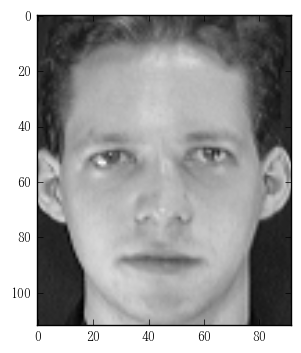

In [1135]:
visualize_face(restored_data[0])